<a href="https://colab.research.google.com/github/ShailendraSSY/Neural-Network/blob/master/M1_AST_04_Probability_Statistics_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Deep Learning
## A program by IISc and TalentSprint
### Assignment 4: Probability and Statistics 

## Learning Objectives

At the end of the experiment, you will be able to

* get a broad exposure of the estimators and the way to deal them.
* understand the terms like parameter estimation, bias estimator, and consistency.

* understand the difference between dependent and independent events.
* understand the concepts of mean squared error, hypothesis testing and maximum likelihood estimation.
*   understand the bayesian inference with prior and posterior distributions.
*   understand bayesian point estimators with map estimator.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200023" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9910549998" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_AST_04_Probability_Statistics_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing required packages

In [4]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
from scipy import stats
import scipy.stats as st
import scipy
from scipy.stats import gmean, hmean
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')

 **1.** The scores of five people playing golf are 3, 4, 4, 5 and 7. Find the mean, median and mode for the scores.

In [5]:
l = [3, 4, 4, 5, 7]

In [6]:
np.mean(l)

4.6

In [7]:
np.median(l)

4.0

In [8]:
stats.mode(l)

ModeResult(mode=array([4]), count=array([2]))

**2.**  The length of crystals from a solutions are: 9, 2, 5, 4, 12, 7, 8 and 11. Calculate the standard deviation of the length of the crystals.

In [9]:
k = [9, 2, 5, 4, 12, 7, 8, 11]
np.std(k)

3.2307119958300214

 **3.** Calculate the variance of salaries for the dataframe given below:
 
 dataframe = ({'salaries': [33219, 36254, 38801, 46335, 46840, 47596, 55130, 56863, 78070, 88830]})

In [10]:
data = pd.DataFrame({'salaries': [33219, 36254, 38801, 46335, 46840, 
                                            47596, 55130, 56863, 78070, 88830]})

data.salaries.mean() 

52793.8

In [11]:
data.salaries.var()

324025267.0666667

 **4.**  The scores of five people playing golf are 3, 4, 4, 5 and 7. Find Harmonic and Geometric mean for the scores.

**Hint:** To know more about Harmonic and Geometric mean click
  [here](https://medium.com/@sharmi.v.murali/arithmetic-mean-vs-geometric-mean-vs-harmonic-mean-b956cf1b2b3f)

In [12]:
l = [3, 4, 4, 5, 7]
print("The geometric mean is :",gmean(l))
print("The harmonic mean is :",hmean(l))

The geometric mean is : 4.416333444896913
The harmonic mean is : 4.251012145748988


**5.** Calculate the correlation between Salary and Experience(In Years) columns for the below dataframe:

dataframe = (

{'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],

'Salary':[50000, 54000, 50000, 189000, 55000, 40000, 59000],

'Hours':[41,40,36,17,35,39,40],

'Experience(In Years)':[2, 2, 3, 7, 5, 2, 4]})

In [13]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Experience(In Years)':[2, 2, 3, 7, 5, 2, 4]})

In [14]:
# Calculating the correlation between Salary and Experience(In Years)
print(df['Experience(In Years)'].corr(df['Salary']))

0.8314219298762264


 **6.** Find the quartile thresholds for the weekly hours worked by the employees for the below-mentioned dataframe.

dataframe = (

{'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],

'Salary':[50000, 54000, 50000, 189000, 55000, 40000, 59000],

'Hours':[41,40,36,17,35,39,40],

'Experience(In Years)':[2, 2, 3, 7, 5, 2, 4]})

In [15]:
df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Experience(In Years)':[2, 2, 3, 7, 5, 2, 4]})

In [16]:
print("The quartile threshold values are",df['Hours'].quantile([0.25, 0.5, 0.75]))

The quartile threshold values are 0.25    35.5
0.50    39.0
0.75    40.0
Name: Hours, dtype: float64


### Parameter Estimation

**Parameter Estimation:** Parameters are defined as the characteristics of the given data. Estimators are defined as the predictions of values with the help of the dataset.

Any function of a random sample that is used to estimate the values of the parameter of a given dataset is called Parameter Estimation.

If $x_1,x_2,x_3,....x_n$ is the sample size of size n, then

$T_n(x_1,x_2,x_3,....x_n)$ will be the estimator of parameter.

**7.** Find the mean, median and standard deviation for the dataframe that is given below.

dataframe = {'age' : [ 23, 34, 23, 55, 43, 29, 34, 35, 49, 59 ],

  'weight': [ 45, 56, 67, 78, 89, 90, 94, 95, 88, 67 ],

  'height': [ 171, 182, 154, 169, 182, 154, 196, 169, 178, 152 ]}

In [17]:
data = {'age' :[23,34,23,55,43,29,34,35,49,59],
        'weight':[45,56,67,78,89,90,94,95,88,67],
        'height':[171,182,154,169,182,154,196,169,178,152]}
df= pd.DataFrame(data)

print("The mean for the dataset is:",df.mean())
print("The median for the dataset is:",df.median())
print("The standard deviation for the dataset is:",df.std())

The mean for the dataset is: age        38.4
weight     76.9
height    170.7
dtype: float64
The median for the dataset is: age        34.5
weight     83.0
height    170.0
dtype: float64
The standard deviation for the dataset is: age       12.677189
weight    17.361836
height    14.384019
dtype: float64


### Bias Estimation

**Bias Estimation:**  Bias is a term that refers to any type of error or distortion that is found with the use of analysis. Bias Estimation is the difference between the parameter to be estimated and the mathematical expectation of the estimator.

$bias(\hatθ_n)$ = $E[\hatθ_n]- \hatθ_n$

The estimator is said to be unbiased when expected parameter and the original parameter are same i.e $E[θ_n^|] = θ_n^|.$

**8.** Calculate the bias for the below given dataframe.

dataframe = {
'Expected_parameter':[2,3,1,5,6,7,8,9,6,5,4,3,2],

'Original_parameter':[3,4,3,2,2,4,5,6,9,6,6,4,5]
}

In [18]:
data = {
    'Expected_parameter':[2,3,1,5,6,7,8,9,6,5,4,3,2],
    'Original_parameter':[3,4,3,2,2,4,5,6,9,6,6,4,5]
}
df= pd.DataFrame(data)
df['Bias'] = df['Expected_parameter'] - df["Original_parameter"] #Calculating the bias according to the formula
print("The bias is",df["Bias"])

The bias is 0    -1
1    -1
2    -2
3     3
4     4
5     3
6     3
7     3
8    -3
9    -1
10   -2
11   -1
12   -3
Name: Bias, dtype: int64


### Mean Squared Error

**Mean Squared Error :** 


Let $\hat{X}=g(Y)$ be an estimator of the random variable $X$, given that we have observed the random variable $Y$. The mean squared error (MSE) of this estimator is defined as

$E[(X−\hat{X})^2]=E[(X−g(Y))^2].$


**9.** Calculate the Mean Squared Error for the Y_true with values [1,1,2,2,4] and Y_pred with values [0.6,1.29,1.99,2.69,3.4]

In [19]:
# Defining Y_true and Y_pred values
Y_true = [1,1,2,2,4]
Y_pred = [0.6,1.29,1.99,2.69,3.4]  

# Calculating Mean Squared Error
MSE = np.square(np.subtract(Y_true,Y_pred)).mean()
print("The mean Square Error is ",MSE)

The mean Square Error is  0.21606


### Maximum Likelihood Estimation

**Maximum Likelihood Estimation:** Maximum likelihood estimation is a method that determines maximum values for the parameter of a model.

**10.** Build 100 data points from the normal distribution with  mean=1 and standard deviation = 5. Estimate their maximum likelihood of mean, variance, and standard deviation from the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


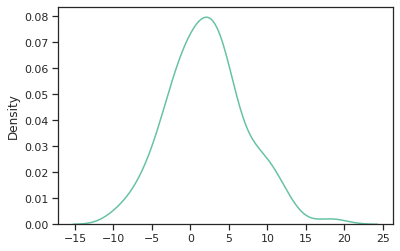

In [20]:
# Building the distributed data from mean and standard deviation
mean = 1
std = 5
N_points = 100
#  Finding the random normal distributed data 
data = np.random.normal(mean, std, N_points)
sns.distplot(data, hist = False)

In [21]:
# Printing the original mean and variance
print('Original mean is '+str(mean) + ', variance is ' + str(std**2)," and standard deviation is " +str(std))

Original mean is 1, variance is 25  and standard deviation is 5


In [22]:
# Calculating the mean from the data
mu_ML = 1/N_points*sum(data)
print('Maximum likelihood estimation of mean from the normal distributed data is '+str(mu_ML))

Maximum likelihood estimation of mean from the normal distributed data is 2.1378630937433645


In [23]:
# Calculating the variance from the data
var_ML = (1/(N_points-1))*sum([(x-mu_ML)**2 for x in data])
print('Maximum likelihood estimation of variance from the normal distributed data is ' + str(var_ML))

Maximum likelihood estimation of variance from the normal distributed data is 25.038406259953213


In [24]:
# Calculating the standard deviation from the data
std_ML = math.sqrt(var_ML)
print("Maximum likelihood estimation of standard deviation from the normal distributed data is  "+str(std_ML))

Maximum likelihood estimation of standard deviation from the normal distributed data is  5.003839152086447


### Bayesian inference

**Bayesian inference :**- Bayesian inference is a method of statistical inference in which Bayes' theorem is used to update the probability for a hypothesis as more evidence or information becomes available. Bayesian inference is an important technique in statistics, and especially in mathematical statistics  

The components of Bayesian inference are:

1.$ p(Θ)$ is the set of prior distributions for parameter set $Θ$ and it uses probability as a means of quantifying uncertainty about $Θ$ before taking the data into account.


2.$p(y|Θ)$ is the likelihood or likelihood function, in which all variables are related in a full probability model.


3.$p(Θ|y)$ is the joint posterior distribution that expresses uncertainty about parameter set $Θ$ after taking both the prior and the data into account. If parameter set $Θ$ is partitioned into a single parameter of interest $φ$ and the remaining parameters are considered noise parameters, then $p(φ|y)$ is the marginal posterior distribution.

**11.** Bob is selecting one marble from two bowls of marbles. The first bowl has 75 red marbles and 25 blue marbles. The second bowl has 50 red marbles and 50 blue marbles. Given that Bob is equally likely to choose from either bowl and does not discriminate between the marbles themselves, Bob in fact chooses a red marble. What is the probability Bob picked the marble from bowl 1 and bowl 2? 

In [25]:
# Probability of fetching the marble from bowl
P_H_1=P_H_2 =0.5  
# Probability of fetching the red marble from first bowl
P_E_H_1 = 75/100
# Probability of fetching the marble from second bowl
P_E_H_2= 50/100
# Applying the Bayesian formula to pick the red marble from first bowl
P_H_1_E = (P_E_H_1*P_H_1)/((P_E_H_1*P_H_1)+(P_E_H_2*P_H_2))
P_H_2_E = (P_E_H_2*P_H_2)/((P_E_H_1*P_H_1)+(P_E_H_2*P_H_2))
print("The probability of fetching the red marble from bowl one is "+str(P_H_1_E)+ " and from bowl 2 is "+str(P_H_2_E))

The probability of fetching the red marble from bowl one is 0.6 and from bowl 2 is 0.4


### Prior and Posterior distribution

**Prior distribution:** 
A Prior distribution represents your belief about the true or false value of a parameter. It shows your “best guess.”

**Posterior distribution:**  The posterior distribution summarizes what you know after the data has been observed. The summary of the evidence from the new observations is the likelihood function.
It is represented as $Posterior$ $Distribution$ $=$ $Prior$ $Distribution + Likelihood$ $Function (“new$ $evidence”)$

**12.** Construct a prior and posterior distribution with some binominal random distribution techniques.

In [26]:
def bern_post(n_params=1000, n_sample=1000, true_p=.5, prior_p=.5, n_prior=1000):
    # Creating the samples   
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)

    # Calculating the Likelihood
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    likelihood = likelihood / np.sum(likelihood)

    # Prior sample
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)

    # Finding the posterior  
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
    
    # Plotting the graph
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior

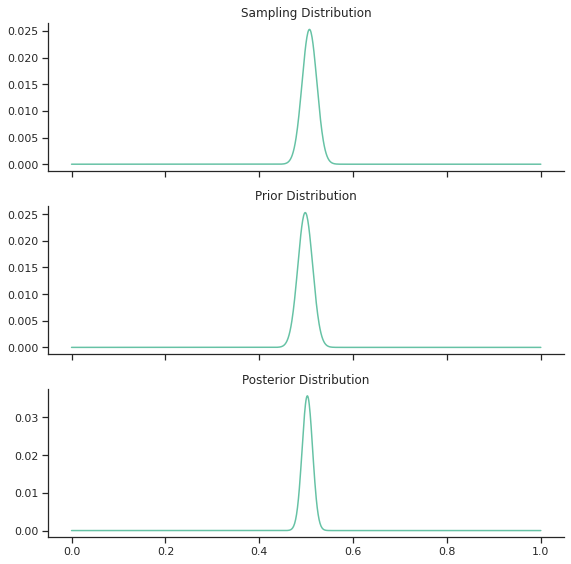

In [27]:
moredata_post = bern_post(n_sample=1000)

### Covariance

**Covariance:**Covariance is a measure of the relationship between two random variables. The metric evaluates how much - to what extent – the variables change together. In other words, it is essentially a measure of the variance between two variables. However, the metric does not assess the dependency between variables.

 $Cov(X,Y) =  \frac{∑ [(X_i - X_m) * (Y_j - Y_m)]} {(n - 1)}$

Where:

* $X_i$ – the values of the $X$-variable
* $Y_j$ – the values of the $Y$-variable
* $X_m$ – the mean (average) of the $X$-variable
* $Y_m$ – the mean (average) of the $Y$-variable
* $n$ – the number of data points
  
 
 It can also be represented as :
 $Cov(X,Y)=E[(X−E(X))(Y−E(Y))]=E[XY]−(E(X))(E(Y))$.

### Variance 

**Variance:**The variance is the average of the squared differences from the mean.
It is represented as $S^2$. the formula for variance is :

$S^2 = \frac {\Sigma(x_i - x_m)^2}{(n-1)}$
where:
$x_i$ are the values of $x$.
$x_m$ is the mean of $x$ 
$n$ is the number of data points. 

**13.** Create a random integer matrix of size 3x3 and find the variance and covariance of it.

In [28]:
matrix = np.random.randint(10, size=(3, 3))
print("The matrix is:", matrix)
cov_matrix = np.cov(matrix)
var_matrix = np.var(matrix, dtype = np.float64)
print("The covariance of the matrix is :",cov_matrix)
print("\n Variance of array is : ", var_matrix) 

The matrix is: [[7 4 8]
 [0 0 6]
 [6 5 7]]
The covariance of the matrix is : [[ 4.33333333  5.          2.        ]
 [ 5.         12.          3.        ]
 [ 2.          3.          1.        ]]

 Variance of array is :  7.728395061728394


### Please answer the questions below to complete the experiment:




In [29]:
#@title Q.1. Select the best option that describes the property of covariance for a matrix X of size mxn? { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","positive semidefinite", "symmetric", "Its main diagonal contains variances", "All the above", "None of the above"]

In [30]:
#@title Q.2. If X is a continuous random variable with pdf f(x), then what is the relationship between Variance and the Expected value of X? { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","E[X]**2 - E[X**2]", "E[X**2] - E[X]**2", "E[X**2] - XE[X]", "None of the above"]

In [31]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [32]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [33]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [34]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [35]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [36]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Question 1
